In [149]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the JSON data
with open('descriptors_merged.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a pandas DataFrame
# Each row will have 'formula', 'descriptors', and 'e_f' columns
formulas = []
descriptors = []
e_f_values = []


for formula, values in data.items():
    if values[1] < 10 and values[1] > -10:
        descriptors.append(values[0])  # Descriptor values
        e_f_values.append(values[1])    # e_f value
        formulas.append(formula)
    else:
        pass

# Create DataFrame
df = pd.DataFrame(descriptors)
# print(df)

df['e_f'] = e_f_values
df['formula'] = formulas

# Split the data into features (X) and target (y)
X = df.drop(columns=['e_f', 'formula'])  # All descriptor columns
y = df['e_f']    

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [150]:

print(len(X_train))
print(len(X_test))

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(
    random_state=32,
    max_features=0.5,        # Reduced number of features per split
)
model.fit(X_train.drop(columns=[9, 10, 11, 12]), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.drop(columns=[9, 10, 11, 12]))
y_pred_train = model.predict(X_train.drop(columns=[9, 10, 11, 12]))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)


print("Mean Squared Error:", mse)
print("R-squared for the train : ", r2_train)
print("R-squared for the test : ", r2_test)


5930
2542
Mean Squared Error: 4.24827259674406
R-squared for the train :  0.8451273128922333
R-squared for the test :  0.3052324912582628


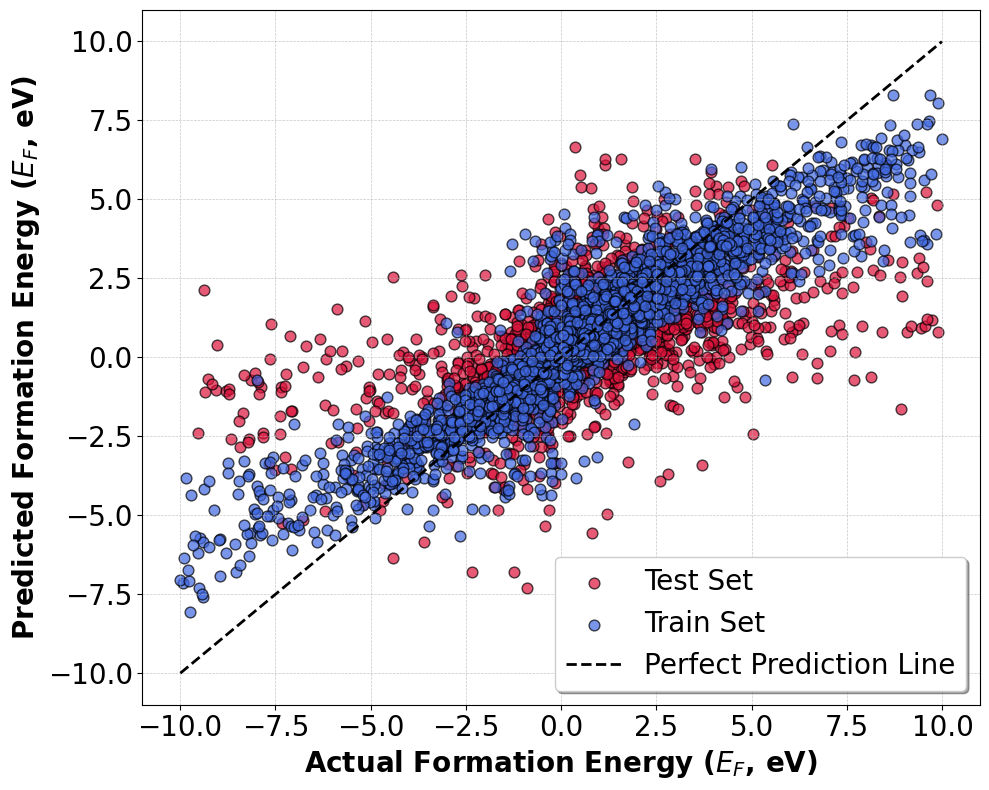

In [151]:
import matplotlib.pyplot as plt

# Combined parity plot for both train and test sets
plt.figure(figsize=(10, 8))

# Plot for test set with enhanced style
plt.scatter(y_test, y_pred, color='crimson', edgecolor='black', alpha=0.7, s=60, label="Test Set")
# Plot for training set with enhanced style
plt.scatter(y_train, y_pred_train, color='royalblue', edgecolor='black', alpha=0.7, s=60, label="Train Set")

# 45-degree reference line (perfect prediction line)
min_val = min(y.min(), y_pred.min(), y_train.min(), y_pred_train.min())
max_val = max(y.max(), y_pred.max(), y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label="Perfect Prediction Line")

# Labels, title, and legend with enhanced font size and style
plt.xlabel("Actual Formation Energy ($E_F$, eV)", fontsize=20, fontweight='bold')
plt.ylabel("Predicted Formation Energy ($E_F$, eV)", fontsize=20, fontweight='bold')
# plt.title("Parity Plot for Training and Testing Sets", fontsize=22, fontweight='bold')

# Enhanced legend
plt.legend(loc='lower right', fontsize=20, frameon=True, shadow=True, fancybox=True)

# Grid and aesthetic adjustments
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the figure as a PNG file with high resolution
plt.tight_layout()
plt.savefig("parity_plot.png", format="png", dpi=300)  # Save as PNG with 300 DPI
plt.show()


In [152]:
# Evaluate the model
mse = mean_squared_error(X_test[9], y_test)
r2_test = r2_score(X_test[9], y_test)
# r2_train = r2_score(y_train, y_pred_train)


print("Mean Squared Error:", mse)
# print("R-squared for the train : ", r2_train)
print("R-squared for the test : ", r2_test)


Mean Squared Error: 0.5929000995395504
R-squared for the test :  0.8913263935415466


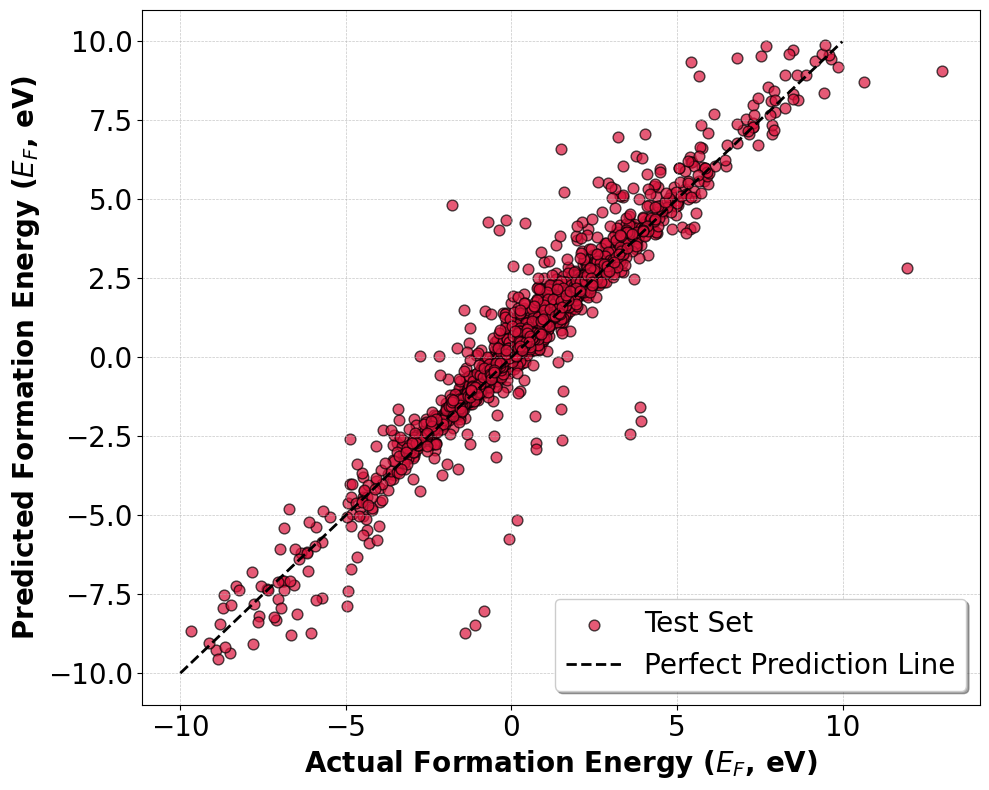

In [153]:
import matplotlib.pyplot as plt

# Combined parity plot for both train and test sets
plt.figure(figsize=(10, 8))

# Plot for test set with enhanced style
plt.scatter(X_test[9], y_test, color='crimson', edgecolor='black', alpha=0.7, s=60, label="Test Set")
# Plot for training set with enhanced style
# plt.scatter(y_train, y_pred_train, color='royalblue', edgecolor='black', alpha=0.7, s=60, label="Train Set")

# 45-degree reference line (perfect prediction line)
min_val = min(y.min(), y_pred.min(), y_train.min(), y_pred_train.min())
max_val = max(y.max(), y_pred.max(), y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label="Perfect Prediction Line")

# Labels, title, and legend with enhanced font size and style
plt.xlabel("Actual Formation Energy ($E_F$, eV)", fontsize=20, fontweight='bold')
plt.ylabel("Predicted Formation Energy ($E_F$, eV)", fontsize=20, fontweight='bold')
# plt.title("Parity Plot for Training and Testing Sets", fontsize=22, fontweight='bold')

# Enhanced legend
plt.legend(loc='lower right', fontsize=20, frameon=True, shadow=True, fancybox=True)

# Grid and aesthetic adjustments
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the figure as a PNG file with high resolution
plt.tight_layout()
plt.savefig("parity_plot_MLP.png", format="png", dpi=300)  # Save as PNG with 300 DPI
plt.show()
